<a href="https://colab.research.google.com/github/AmoghKhaparde/fireDetection/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the main libraries and making sure we have the materials for this project
!pip3 install tensorflow
!pip3 install tensorflow-gpu
!pip3 install opencv-python
!pip3 install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import dependencies
import tensorflow as tf # This is the "machine learning model creator"
import os # This allows the program to control directories and files outside of it

In [ ]:
# Avoid OutOfMemoryErrors by setting GPU Memory Consupmtion Growth limit
gpus = tf.config.experimental.list_physical_devices('GPU') # Find all gpus on this device
for gpu in gpus :
  tf.config.experimental.set_memory_growth(gpu, True) # Setting GPU memory consumption growth

**New New Model**

In [ ]:
# Importing the images
# For this, I will use an extension called "Download All Images" which allows me to download all the images on a google search page which will make it a lot easier to get data

# Now I have to manually get rid of bogus images that were downloaded

# Now that we have proper images, we have to get rid of the ones of unwanted file types, or some that don't open in python

# Importing dependencies
import cv2 # Helps to display images
import imghdr # Determines the file type of the image
from matplotlib import pyplot as plt # The main module for displaying images

data_dir = 'drive/MyDrive/Image Classification2/' # Directory which the files are in
image_exts = ['jpeg', 'jpg', 'bmp', 'png'] # These file xtensions are the only ones that we want for this model becausse these extensions are the most flexible and allow me to change parts of the image easily

for image_class in os.listdir(data_dir) : # goes through files in the ImageClassification folder: the folder with images of fires and the folder of images without fires
  for image in os.listdir(os.path.join(data_dir, image_class)) : # goes through the images in each folder
      image_path = os.path.join(data_dir, image_class, image) # stores the file path in a variable called path
      try : # Makes sure that there is no issue when you try to open the image in the python, otherwise it gets rid of that image
        img = cv2.imread(image_path) # The file path and the name of the image, excluding the file type
        ext = imghdr.what(image_path) # the extension of the image
        if ext not in image_exts : # Only keeps the types of flies that we want, otherwise, delete the image
          os.remove(image_path)
      except Exception as e : # If we cannot open the image in python then get rid of it
        os.remove(image_path)

Found 793 files belonging to 2 classes.


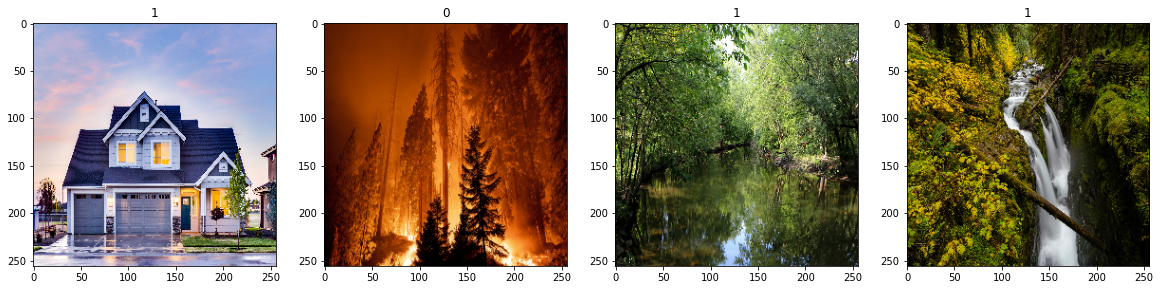

In [ ]:
# In this segment of code, we are just showing some random images of the data set and what class they belong to, since later in the code we are changing the sizing of the image

import numpy as np # Importing another dependency. The images will be stored as multidimensional numpy arrays so that the machine learning modelcan scan through the image
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/Image Classification2') # stores our data in a variable called data and builds the data pipeline
data_iterator = data.as_numpy_iterator() # allows us to access the data pipline
batch = data_iterator.next() # this is actually accessing the data pipeline. This includes the image itself listed as numpy arrays, and the label of the image (fire or not fire)

# REMEMBER:
# IMAGE CLASS 1 = NO FIRE
# IMAGE CLASS 0 = FIRE

# The next 4 lines just plot 4 images randomly to see what the images look like before I resize the images in the data pipeline

fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

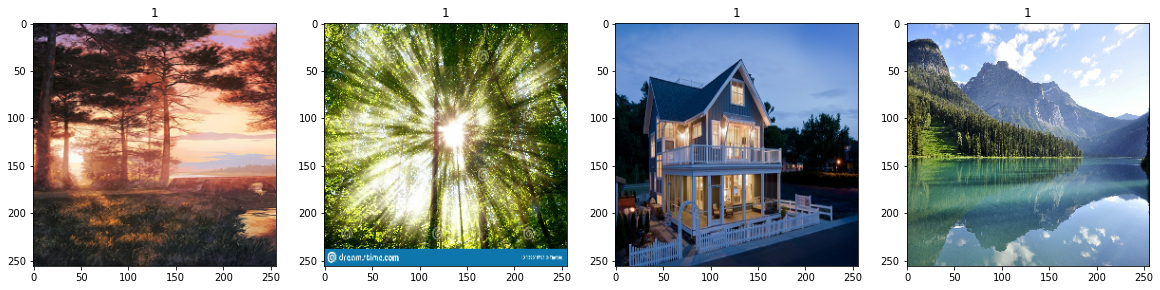

In [ ]:
# We now need to scale the image values from being 0-255, to 0-1, which will help with producing results faster and more efficiently because this is a binary classifier, so it can deal with binary values better (resize the image)

data = data.map(lambda x,y: (x/255,y)) # This resizes the image's x values to be between 0-1.

# The next 6 lines just show another 4 random images and this time they should be slightly distorted.
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Now we split the data in testing, training, and validation sets to train the neural network model
train_size = int(len(data)*0.7) # This is used to train the model
val_size = int(len(data)*0.2) # Evaluates the model while we are still building it
test_size = int(len(data) * 0.1) # This is the final evaluation of the model

# Loss, as seen down below, are the values indicating the difference from the desired target state(s)
# val_loss is to ascertain performance on an entire epoch (a runthrough of the data) after the training loss has been calculated and weight updates have been completed

train = data.take(train_size) # Getting the data for training
val = data.skip(train_size).take(val_size) # Getting the data for validation data set
test = data.skip(train_size + val_size).take(test_size) # Getting the data for the test data set

from tensorflow.keras.models import Sequential # Imports the Sequential function, which allows me to create a model that has 1 input and creates 1 output.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Imports the functions that are needed for the model

model = Sequential() # Create the model

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # First layer, a convolution, contains the input shape, has 16 filters of shape 3x3 pixels with a stride (the number of pixels shifts over the input matrix.) of 1 to scan for relevant information
# Relu is the rectified linear unit function helps to prevent the exponential growth in the computation required to operate the neural network.
model.add(MaxPooling2D()) # Adds a MaxPooling layer and condenses the information
model.add(Conv2D(32, (3,3), 1, activation='relu')) # Creates more layers
model.add(MaxPooling2D()) #                        ^^^^^
model.add(Conv2D(16, (3,3), 1, activation='relu')) # ^^^^^
model.add(MaxPooling2D()) #                           ^^^^^
model.add(Conv2D(16, (3,3), 1, activation='relu')) # ^^^^^
model.add(MaxPooling2D()) #                           ^^^^^
model.add(Flatten()) # Flattens the image which would make it easier to analyze with neurons rather than a 3d model
model.add(Dense(256, activation='relu')) # We are adding 256 neurons to the neural network. We use the relu function so the model does not activate all the neurons at the same time
model.add(Dense(1, activation='sigmoid')) # Sigmoid is another function and it is used because whatever input you pass in, it will pass out either 1 or 0, which is what we are using to classify if there is a fire or there isnt. This is effectively the output layer

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # Passing the model through the adams optimizer. I am keeping track of the losses, and in this specific model we are looking for its accuracy

model.summary() # Prints a summary of the model and how it will work

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
# This is where we are training the model

logdir='logs' # Create the logs directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # This line saves model at a particular checkpoint (after each epoch)
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback]) # this line fits the model to the data. epochs is one run over the entire set of training data. It runs over the batches again and again and increases its accuracy in the process and learns from the data.

Epoch 1/25
17/17 [==============================] - 57s 3s/step - loss: 0.6159 - accuracy: 0.6820 - val_loss: 0.4833 - val_accuracy: 0.7625
Epoch 2/25
17/17 [==============================] - 62s 3s/step - loss: 0.4466 - accuracy: 0.7849 - val_loss: 0.2944 - val_accuracy: 0.8500
Epoch 3/25
17/17 [==============================] - 57s 3s/step - loss: 0.3608 - accuracy: 0.8493 - val_loss: 0.3922 - val_accuracy: 0.8375
Epoch 4/25
17/17 [==============================] - 56s 3s/step - loss: 0.3283 - accuracy: 0.8695 - val_loss: 0.3838 - val_accuracy: 0.8562
Epoch 5/25
17/17 [==============================] - 57s 3s/step - loss: 0.3368 - accuracy: 0.8511 - val_loss: 0.3586 - val_accuracy: 0.8625
Epoch 6/25
17/17 [==============================] - 57s 3s/step - loss: 0.2582 - accuracy: 0.8897 - val_loss: 0.3049 - val_accuracy: 0.8687
Epoch 7/25
17/17 [==============================] - 57s 3s/step - loss: 0.2195 - accuracy: 0.9136 - val_loss: 0.3050 - val_accuracy: 0.8813
Epoch 8/25
17/17 [==

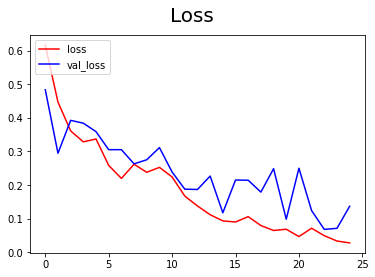

In [ ]:
# Now I am plotting the relation between Loss and validation loss during the training of the program

# Loss, as seen down below, are the values indicating the difference from the desired target state(s)
# Validation data allows me to see if I am overfitting the model to the data by testing the model while it's being trained.
# val_loss is what you can expect the real world values to be like, but the loss ithe model's loss

fig = plt.figure() # Create a matplotlib plot
plt.plot(hist.history['loss'], color='red', label='loss') # Plot the trend of loss during the training
plt.plot(hist.history['val_loss'], color='blue', label='val_loss') # Plot the trend of val_loss during the training
fig.suptitle('Loss', fontsize=20) # set the title of the graph
plt.legend(loc="upper left") # Set the legend/key for the graph
plt.show() # Show the graph

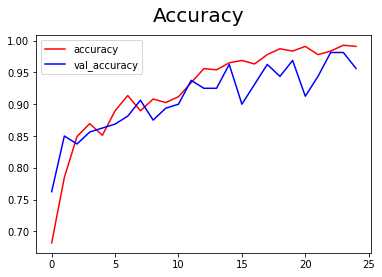

In [ ]:
# Now I am plotting the difference between the accuracy and the validation accuracy

# Accuracy is the models ability to correctly learn from the training data
# Validation data allows me to see if I am overfitting the model to the data by testing the model while it's being trained.
# Val_accuracy is what you can expect the model's accuracy to be after the epoch, and accuracy is the actual current accuracy of the model

fig = plt.figure() # Create a matplotlib plot
plt.plot(hist.history['accuracy'], color='red', label='accuracy') # Plot the trend of accuracy during the training
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy') # Plot the trend of val_accuracy during the training
fig.suptitle('Accuracy', fontsize=20) # set the title of the graph
plt.legend(loc="upper left") # Set the legend/key for the graph
plt.show() # Show the graph

In [ ]:
# Now we are testing the model against the test data set (since everything else has gone well)

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # Import the modules
pre = Precision() # create an instance of the precision class and set it as pre. This is the fraction of relative instances among the retrieved instances.  The precision measures the model’s trustiness in classifying if there is a fire
re = Recall() # create an instance of the recall class and set it as re. Recall is the fraction of relevant instances that we retreieved. The recall measures how many images with were correctly classified by the model
acc = BinaryAccuracy() # create an instance of the binary accuracy class and set it as acc. This is the percentage of predicted values that match with actual values.

for batch in test.as_numpy_iterator(): # Get a batch from the test data set and set the X image itself to x, and set y as the right answer
  X, y = batch
  prediction = model.predict(X) # Make prediction
  pre.update_state(y, prediction) # Check prediction and update the variables above based on this
  re.update_state(y, prediction) # ^^^^^^^
  acc.update_state(y, prediction) # ^^^^^^

print(pre.result().numpy(), re.result().numpy(), acc.result().numpy()) # Print the precision, recall, and binary accuracy

1/1 [==============================] - 0s 375ms/step
0.9782609 1.0 0.984375


Original Image:


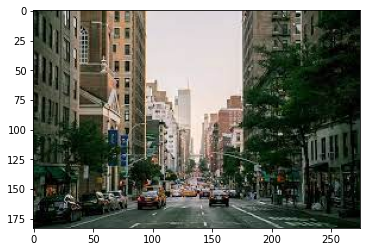

Resized Image: 


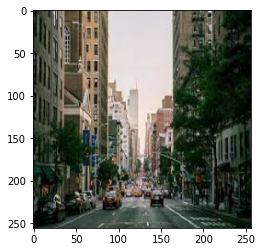

1/1 [==============================] - 0s 37ms/step
Prediction: 94.83536% that there is not an uncontrolled fire in the picture, according to the model.
Predicted Class: Uncontrolled fire does not exist in this picture


In [ ]:
# This is a test of the model with a random image found on the internet

import cv2

img = cv2.imread('drive/MyDrive/Image Classification2/nofire11.jpeg') # Find the image in google drive, this was download oof of the internet randomly and was not seen by the model during its training
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # The color of the image is BGR (Some color variation that we are unfamiliar with) rather than RGB (what humans see), so we switch the image to rgb format
plt.imshow(img) # Put the image on the graph
print('Original Image:')
plt.show() # Show the graph (image)

resized_image = tf.image.resize(img, (256,256))
plt.imshow(resized_image.numpy().astype(int))
print('Resized Image: ')
plt.show() # Shows the resized image

prediction = model.predict(np.expand_dims(resized_image/255, 0)) # Initializing the prediction variable
print('Prediction:',str(round((prediction[0][0]*100), 5))+'% that there is not an uncontrolled fire in the picture, according to the model.') # prints out the model's conclusion as a percentage

if prediction > 0.75: # This tells the computer to contact emergency services to and warn them of an uncontrolled fire if there is 75% chance that there is a fire in the image
  print('Predicted Class: Uncontrolled fire does not exist in this picture') # Prints that there isnt a fire if the prediction value is closer to 1 than 0
else:
  print('Predicted Class: Uncontrolled fire exists in this picture') # Prints that there is a fire if the prediction value is closer to 0 than 1

**New Model**

In [ ]:
# Importing the images
# For this, I will use an extension called "Download All Images" which allows me to download all the images on a google search page which will make it a lot easier to get data

# Now I have to manually get rid of bogus images that were downloaded

# Now that we have proper images, we have to get rid of the ones of unwanted file types, or some that don't open in python

# Importing dependencies
import cv2 # Helps to display images
import imghdr # Determines the file type of the image
from matplotlib import pyplot as plt # The main module for displaying images

data_dir = 'drive/MyDrive/ImageClassification' # Directory which the files are in
image_exts = ['jpeg', 'jpg', 'bmp', 'png'] # These file xtensions are the only ones that we want for this model becausse these extensions are the most flexible and allow me to change parts of the image easily

for image_class in os.listdir(data_dir) : # goes through files in the ImageClassification folder: the folder with images of fires and the folder of images without fires
  for image in os.listdir(os.path.join(data_dir, image_class)) : # goes through the images in each folder
      image_path = os.path.join(data_dir, image_class, image) # stores the file path in a variable called path
      try : # Makes sure that there is no issue when you try to open the image in the python, otherwise it gets rid of that image
        img = cv2.imread(image_path) # The file path and the name of the image, excluding the file type
        ext = imghdr.what(image_path) # the extension of the image
        if ext not in image_exts : # Only keeps the types of flies that we want, otherwise, delete the image
          os.remove(image_path)
      except Exception as e : # If we cannot open the image in python then get rid of it
        os.remove(image_path)


Found 637 files belonging to 2 classes.


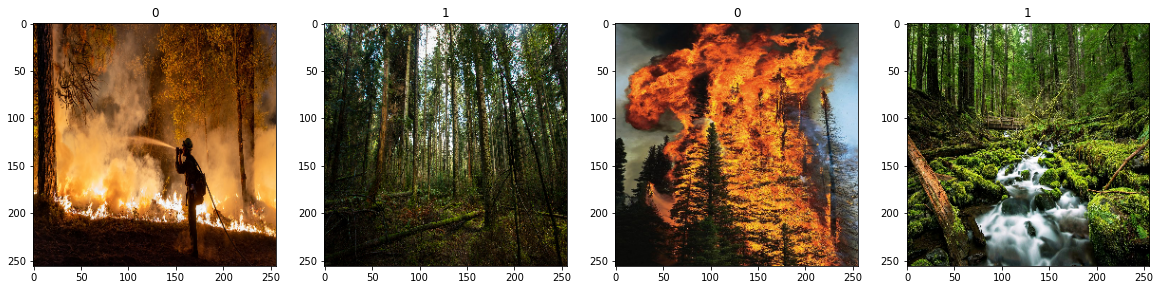

In [ ]:
# In this segment of code, we are just showing some random images of the data set and what class they belong to, since later in the code we are changing the sizing of the image

import numpy as np # Importing another dependency. The images will be stored as multidimensional numpy arrays so that the machine learning modelcan scan through the image
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/ImageClassification') # stores our data in a variable called data and builds the data pipeline
data_iterator = data.as_numpy_iterator() # allows us to access the data pipline
batch = data_iterator.next() # this is actually accessing the data pipeline. This includes the image itself listed as numpy arrays, and the label of the image (fire or not fire)

# REMEMBER:
# IMAGE CLASS 1 = NO FIRE
# IMAGE CLASS 0 = FIRE

# The next 4 lines just plot 4 images randomly to see what the images look like before I resize the images in the data pipeline

fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


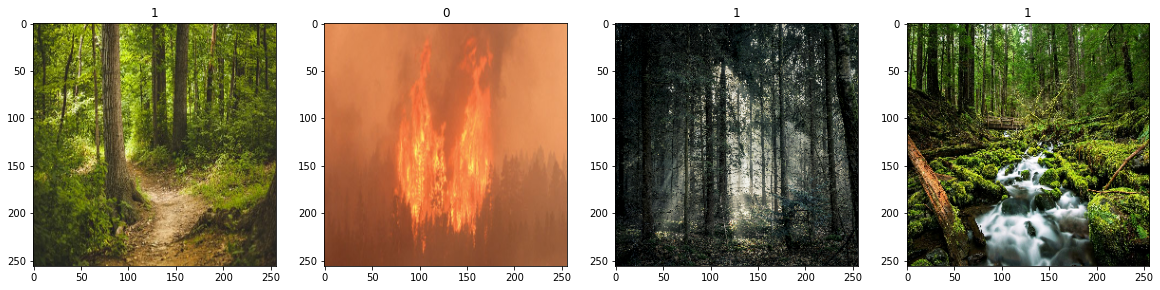

In [ ]:
# We now need to scale the image values from being 0-255, to 0-1, which will help with producing results faster and more efficiently because this is a binary classifier, so it can deal with binary values better (resize the image)

data = data.map(lambda x,y: (x/255,y)) # This resizes the image's x values to be between 0-1.

# The next 6 lines just show another 4 random images and this time they should be slightly distorted.
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Now we split the data in testing, training, and validation sets to train the neural network model
train_size = int(len(data)*0.7) # This is used to train the model
val_size = int(len(data)*0.2) # Evaluates the model while we are still building it
test_size = int(len(data) * 0.1) # This is the final evaluation of the model

# Loss, as seen down below, are the values indicating the difference from the desired target state(s)
# val_loss is to ascertain performance on an entire epoch (a runthrough of the data) after the training loss has been calculated and weight updates have been completed

train = data.take(train_size) # Getting the data for training
val = data.skip(train_size).take(val_size) # Getting the data for validation data set
test = data.skip(train_size + val_size).take(test_size) # Getting the data for the test data set

from tensorflow.keras.models import Sequential # Imports the Sequential function, which allows me to create a model that has 1 input and creates 1 output.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Imports the functions that are needed for the model

model = Sequential() # Create the model

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # First layer, a convolution, contains the input shape, has 16 filters of shape 3x3 pixels with a stride (the number of pixels shifts over the input matrix.) of 1 to scan for relevant information
# Relu is the rectified linear unit function helps to prevent the exponential growth in the computation required to operate the neural network.
model.add(MaxPooling2D()) # Adds a MaxPooling layer and condenses the information
model.add(Conv2D(32, (3,3), 1, activation='relu')) # Creates more layers
model.add(MaxPooling2D()) #                        ^^^^^
model.add(Conv2D(16, (3,3), 1, activation='relu')) # ^^^^^
model.add(MaxPooling2D()) #                           ^^^^^
model.add(Flatten()) # Flattens the image which would make it easier to analyze with neurons rather than a 3d model
model.add(Dense(256, activation='relu')) # We are adding 256 neurons to the neural network. We use the relu function so the model does not activate all the neurons at the same time
model.add(Dense(1, activation='sigmoid')) # Sigmoid is another function and it is used because whatever input you pass in, it will pass out either 1 or 0, which is what we are using to classify if there is a fire or there isnt. This is effectively the output layer

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # Passing the model through the adams optimizer. I am keeping track of the losses, and in this specific model we are looking for its accuracy

model.summary() # Prints a summary of the model and how it will work

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
# This is where we are training the model

logdir='logs' # Create the logs directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # This line saves model at a particular checkpoint (after each epoch)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) # this line fits the model to the data. epochs is one run over the entire set of training data. It runs over the batches again and again and increases its accuracy in the process and learns from the data.

In [ ]:
# Now I am plotting the relation between Loss and validation loss during the training of the program

# Loss, as seen down below, are the values indicating the difference from the desired target state(s)
# Validation data allows me to see if I am overfitting the model to the data by testing the model while it's being trained.
# val_loss is what you can expect the real world values to be like, but the loss ithe model's loss

fig = plt.figure() # Create a matplotlib plot
plt.plot(hist.history['loss'], color='red', label='loss') # Plot the trend of loss during the training
plt.plot(hist.history['val_loss'], color='blue', label='val_loss') # Plot the trend of val_loss during the training
fig.suptitle('Loss', fontsize=20) # set the title of the graph
plt.legend(loc="upper left") # Set the legend/key for the graph
plt.show() # Show the graph

In [ ]:
# Now I am plotting the difference between the accuracy and the validation accuracy

# Accuracy is the models ability to correctly learn from the training data
# Validation data allows me to see if I am overfitting the model to the data by testing the model while it's being trained.
# Val_accuracy is what you can expect the model's accuracy to be after the epoch, and accuracy is the actual current accuracy of the model

fig = plt.figure() # Create a matplotlib plot
plt.plot(hist.history['accuracy'], color='red', label='accuracy') # Plot the trend of accuracy during the training
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy') # Plot the trend of val_accuracy during the training
fig.suptitle('Accuracy', fontsize=20) # set the title of the graph
plt.legend(loc="upper left") # Set the legend/key for the graph
plt.show() # Show the graph

In [ ]:
# Now we are testing the model against the test data set (since everything else has gone well)

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # Import the modules
pre = Precision() # create an instance of the precision class and set it as pre. This is the fraction of relative instances among the retrieved instances.  The precision measures the model’s trustiness in classifying if there is a fire
re = Recall() # create an instance of the recall class and set it as re. Recall is the fraction of relevant instances that we retreieved. The recall measures how many images with were correctly classified by the model
acc = BinaryAccuracy() # create an instance of the binary accuracy class and set it as acc. This is the percentage of predicted values that match with actual values.

for batch in test.as_numpy_iterator(): # Get a batch from the test data set and set the X image itself to x, and set y as the right answer
  X, y = batch
  prediction = model.predict(X) # Make prediction
  pre.update_state(y, prediction) # Check prediction and update the variables above based on this
  re.update_state(y, prediction) # ^^^^^^^
  acc.update_state(y, prediction) # ^^^^^^

print(pre.result().numpy(), re.result().numpy(), acc.result().numpy()) # Print the precision, recall, and binary accuracy

Original Image:


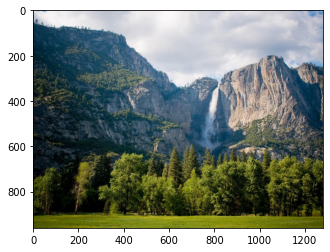

Resized Image: 


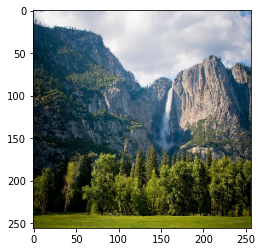

Prediction: 99.70758% that there is not an uncontrolled fire in the picture, according to the model.
Predicted Class: Uncontrolled fire does not exist in this picture


In [ ]:
# This is a test of the model with a random image found on the internet

import cv2

img = cv2.imread('drive/MyDrive/ImageClassification/nofire.jpeg') # Find the image in google drive, this was download oof of the internet randomly and was not seen by the model during its training
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # The color of the image is BGR (Some color variation that we are unfamiliar with) rather than RGB (what humans see), so we switch the image to rgb format
plt.imshow(img) # Put the image on the graph
print('Original Image:')
plt.show() # Show the graph (image)

resized_image = tf.image.resize(img, (256,256))
plt.imshow(resized_image.numpy().astype(int))
print('Resized Image: ')
plt.show() # Shows the resized image

prediction = model.predict(np.expand_dims(resized_image/255, 0)) # Initializing the prediction variable
print('Prediction:',str(round((prediction[0][0]*100), 5))+'% that there is not an uncontrolled fire in the picture, according to the model.') # prints out the model's conclusion as a percentage

if prediction > 0.75: # This tells the computer to contact emergency services to and warn them of an uncontrolled fire if there is 75% chance that there is a fire in the image
  print('Predicted Class: Uncontrolled fire does not exist in this picture') # Prints that there isnt a fire if the prediction value is closer to 1 than 0
else:
  print('Predicted Class: Uncontrolled fire exists in this picture') # Prints that there is a fire if the prediction value is closer to 0 than 1

In [ ]:
# Save the model

from tensorflow.keras.models import load_model
model.save(os.path.join('models','firedetector.h5'))
new_model = load_model('firedetector.h5')
new_model.predict(np.expand_dims(prediction/255, 0))

**Old Model**

In [ ]:
# Importing the images
# For this, I will use an extension called "Download All Images" which allows me to download all the images on a google search page which will make it a lot easier to get data
# We will have to get rid of bad images with wrong file types and stuff like that later

# Now that we have images, we have to get rid of the ones of unwanted file types, or some that don't open in python

# Importing dependencies
import cv2 # Helps to display images
import imghdr # Determines the file type of the image
from matplotlib import pyplot as plt # The main module for displaying images

data_dir = 'drive/MyDrive/Images/' # Directory which the files are in
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir) : # goes through files in the ImageClassification folder: the folder with images of fires and the folder of images without fires
  for image in os.listdir(os.path.join(data_dir, image_class)) : # goes through the images in each folder
      image_path = os.path.join(data_dir, image_class, image) # stores the file path in a variable
      try : # Makes sure that there is no issue when you try to open the imagein the python, otherwise it gets rid of that image
        img = cv2.imread(image_path) # The file path and the name of the image, excluding the file type
        tip = imghdr.what(image_path) # the extension of the image
        if tip not in image_exts : # Only keeps the types of flies that we want
          # print('Image not in exts list {}'.format(image_path))
          os.remove(image_path)
      except Exception as e : # If we cannot open the image in python, then get rid of it
        # print('Issue with image {}'.format(image_path))
        os.remove(image_path)

Found 187 files belonging to 2 classes.


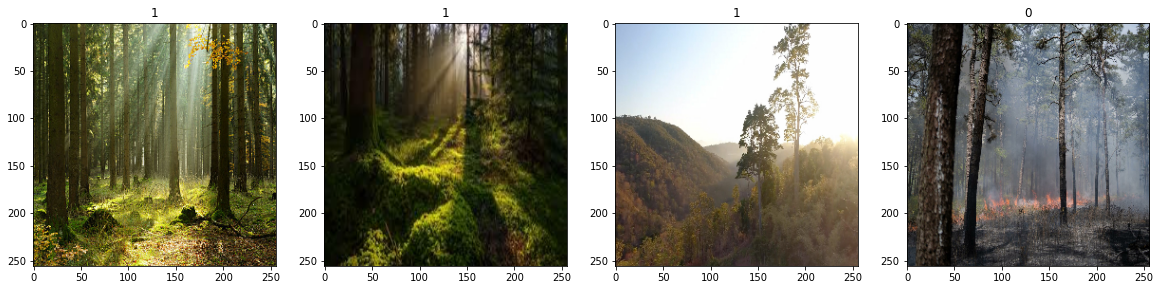

In [ ]:
# In this segment of code, we are just showing some random images of the data set and what class they belong to, since later in the code we are changing the sizing of the image

import numpy as np # Importing another dependency
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/Images/') # stores our data in a variable called data and builds the data pipeline
data_iterator = data.as_numpy_iterator() # allows us to access the data pipline
batch = data_iterator.next() # this is actually accessing the data pipeline. This includes the image itself listed as numpy arrays, and the label of the image (fire or not fire)

# IMAGE CLASS 1 = NO FIRE
# IMAGE CLASS 0 = FIRE

fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

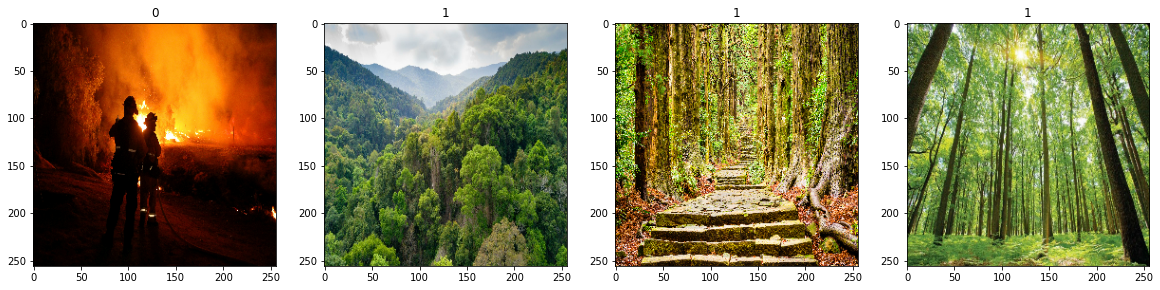

In [ ]:
# We now need to scale the image values from being 0-255, to 0-1, which will help with producing results faster and more efficiently (resize the image)

data = data.map(lambda x,y: (x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Now we split the data in testing, training, and validation sets to train the neural network model
train_size = int(len(data)*0.7) # This is used to train the model
val_size = int(len(data)*0.2) # Evaluates the model while we are still building it
test_size = int(len(data) * 0.1) # This is the final evaluation of the model

# Loss, as seen down below, are the values indicating the difference from the desired target state(s)
# val_loss is to ascertain performance on an entire epoch after the training loss has been calculated and weight updates have been completed

train = data.take(train_size) # Getting the data for training
val = data.skip(train_size).take(val_size) # Getting the data for validation data set
test = data.skip(train_size + val_size).take(test_size) # Getting the data for the test data set

from tensorflow.keras.models import Sequential # Imports the Sequential function, which is: create a model that has 1 input and creates 1 output.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Imports the functions that are needed for the model

model = Sequential() # Create the model

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # First layer, a convolution, contains the input shape, has 16 filters of shape 3x3 with a stride (the number of pixels shifts over the input matrix.) of 1 to scan for relevant information
# Relu is the rectified linear unit function helps to prevent the exponential growth in the computation required to operate the neural network.
model.add(MaxPooling2D()) # Adds a MaxPooling layer and condenses the information
model.add(Conv2D(32, (3,3), 1, activation='relu')) # Creates more layers
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten()) # Flattens the image which would make it easier to analyze with neurons rather than a 3d model
model.add(Dense(256, activation='relu')) # We are adding 256 neurons to the neural network. We use the relu function because it does not activate all the neurons at the same time
model.add(Dense(1, activation='sigmoid')) # Sigmoid is another function and it is used because whatever input you pass in, it will pass out either 1 or 0, which is what we are using to classify if there is a fire or there isnt. This is effectively the output layer

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # Passing the model through the adams optimizer. We keep track of our losses, and in this specific model we are looking for its accuracy

model.summary() # Prints a summary of the model ad how it will work

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
# This is where we are training the model

logdir='logs' # Create the logs directory
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # Helps save model at a particular checkpoint
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback]) # this line fits the model to the data. epochs is one run over the entire set of training data. It runs over the training dataset (batch) again and again and increases its accuracy in the process and learns from the data.

Epoch 1/10
4/4 [==============================] - 22s 4s/step - loss: 1.3715 - accuracy: 0.5000 - val_loss: 0.5169 - val_accuracy: 0.8125
Epoch 2/10
4/4 [==============================] - 20s 4s/step - loss: 0.5033 - accuracy: 0.7188 - val_loss: 0.4712 - val_accuracy: 0.8125
Epoch 3/10
4/4 [==============================] - 23s 5s/step - loss: 0.4227 - accuracy: 0.8359 - val_loss: 0.3641 - val_accuracy: 0.8750
Epoch 4/10
4/4 [==============================] - 24s 5s/step - loss: 0.4059 - accuracy: 0.8984 - val_loss: 0.2703 - val_accuracy: 0.8750
Epoch 5/10
4/4 [==============================] - 25s 6s/step - loss: 0.2887 - accuracy: 0.8750 - val_loss: 0.4203 - val_accuracy: 0.8438
Epoch 6/10
4/4 [==============================] - 24s 5s/step - loss: 0.1895 - accuracy: 0.9453 - val_loss: 0.1436 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 23s 5s/step - loss: 0.1247 - accuracy: 0.9766 - val_loss: 0.0921 - val_accuracy: 1.0000
Epoch 8/10
4/4 [==================

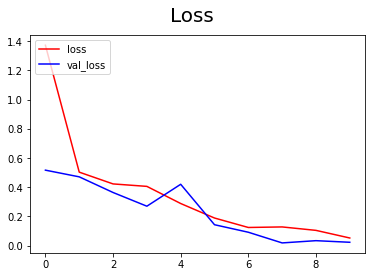

In [ ]:
fig = plt.figure() # Create a matplotlib plot
plt.plot(hist.history['loss'], color='red', label='loss') # Plot the trend of loss during the training
plt.plot(hist.history['val_loss'], color='blue', label='val_loss') # Plot the trend of val_loss during the training
fig.suptitle('Loss', fontsize=20) # set the title of the graph
plt.legend(loc="upper left") # Set the legend/key for the graph
plt.show() # Show the graph

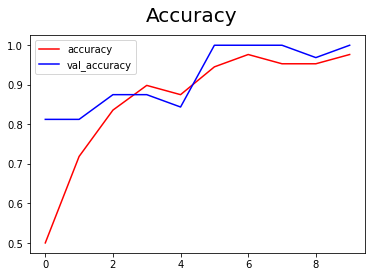

In [ ]:
fig = plt.figure() # Create a matplotlib plot
plt.plot(hist.history['accuracy'], color='red', label='accuracy') # Plot the trend of accuracy during the training
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy') # Plot the trend of val_accuracy during the training
fig.suptitle('Accuracy', fontsize=20) # set the title of the graph
plt.legend(loc="upper left") # Set the legend/key for the graph
plt.show() # Show the graph

In [ ]:
# Now we are testing the model against the test data set (since everything else has gone well)

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # Import the modules
pre = Precision() # create an instance of the precision class and set it as pre. This is the fraction of relative instances among the retrieved instances
re = Recall() # create an instance of the recall class and set it as re. Recall is the fraction of relevant instances that we retreieved
acc = BinaryAccuracy() # create an instance of the binary accuracy class and set it as acc. This is the percentage of predicted values (yPred) that match with actual values

for batch in test.as_numpy_iterator(): # Get a batch from the test data set and set the X image itself to x, and set y as the right answer
  X, y = batch
  prediction = model.predict(X) # Make prediction
  pre.update_state(y, prediction) # Check prediction and update the variables above based on this
  re.update_state(y, prediction) # ^^^^^^^
  acc.update_state(y, prediction) # ^^^^^^

print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.0 0.0 0.0
